<a href="https://colab.research.google.com/github/VasquezSRE/machinelearning-gtc/blob/main/extraction/Feature%20Selection/2_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display_html
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import standardize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sys; sys.path.append('./Feature Selection')
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix
from utils import Utils
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
ut = Utils()

In [ ]:
df = pd.read_csv('./data/CTGsmt with titles.csv')
dataset = df.copy()
dataset.head(2)
df_sorted = df.sort_values(by=['NSP'])

In [ ]:
X = df_sorted.copy()
X.drop(['NSP'], axis=1,  inplace=True)
Y = dataset['NSP'].copy()
df_sorted

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1285,0.111111,0.111111,0.000000,0.000000,0.086957,0.186667,0.161765,0.000000,0.199211,0.000000,...,0.366972,0.043103,0.111111,0.100000,0.425197,0.376147,0.357798,0.007435,1.000000,1
1336,0.407407,0.407407,0.000000,0.010638,0.086957,0.133333,0.323529,0.000000,0.181460,0.187500,...,0.027523,0.482759,0.611111,0.000000,0.653543,0.440367,0.495413,0.375465,0.500000,1
1335,0.407407,0.407407,0.269231,0.019504,0.217391,0.133333,0.294118,0.000000,0.130178,0.312500,...,0.137615,0.448276,0.333333,0.000000,0.653543,0.495413,0.532110,0.263941,0.500000,1
1334,0.407407,0.407407,0.038462,0.003546,0.043478,0.026667,0.367647,0.000000,0.000000,0.125000,...,0.155963,0.293103,0.222222,0.000000,0.433071,0.385321,0.357798,0.163569,0.500000,1
1333,0.407407,0.407407,0.307692,0.014184,0.217391,0.120000,0.308824,0.000000,0.102564,0.437500,...,0.155963,0.448276,0.388889,0.000000,0.653543,0.486239,0.532110,0.282528,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,0.427914,0.427914,0.000000,0.001400,0.043478,0.781000,0.183478,0.011555,0.056410,0.148070,...,0.226012,0.177891,0.307108,0.000000,0.481971,0.406071,0.400283,0.046381,0.605147,3
3855,0.426067,0.426067,0.007751,0.026899,0.174244,0.315337,0.294118,0.000000,0.113393,0.200095,...,0.033000,0.639471,0.677016,0.000000,0.536960,0.298985,0.401611,0.459412,0.500000,3
3854,0.074074,0.074074,0.153846,0.000456,0.347826,0.746667,0.413657,0.000000,0.000000,0.399123,...,0.091743,0.612069,0.396036,0.000000,0.244094,0.123719,0.165138,0.152895,0.000000,3
3864,0.481481,0.481481,0.000000,0.000000,0.342104,0.266667,0.161765,0.000000,0.279300,0.058387,...,0.091743,0.241947,0.107455,0.286839,0.307087,0.403066,0.440367,0.229457,1.000000,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

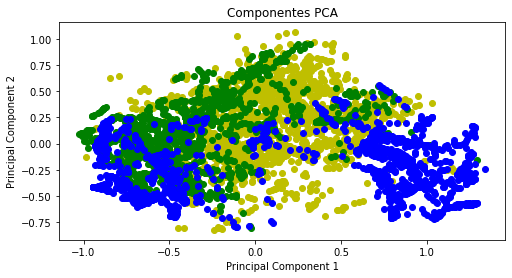

In [ ]:
#PCA
pca = PCA(n_components=20)
pca.fit(X, Y)
transformada_PCA = pca.fit_transform(X, Y)

fig = plt.figure(figsize = (8,4))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Componentes PCA")
x_pca=transformada_PCA[:,0]
y_pca=transformada_PCA[:,1]
plt.scatter(x_pca[0:1654],y_pca[0:1654], color = 'y', label='high emotions')
plt.scatter(x_pca[1655:3308],y_pca[1655:3308], color = 'g')
plt.scatter(x_pca[3309:4962],y_pca[3309:4962], color = 'b')

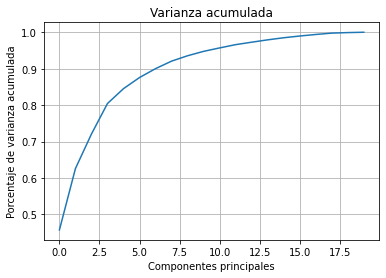

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

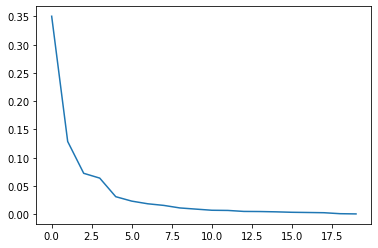

In [ ]:
plt.plot(pca.explained_variance_);

In [ ]:
transformada_PCA.shape


(4965, 20)

In [ ]:
# train gradient boosting tree with PCA

In [ ]:
def experimentar_gbt(num_trees, X, Y):
    """funcion que realiza experimentos de arboles de decision
    num_trees: list[int] lista con el número de arboles usado para el RF
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - numero de arboles usados
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        f1 = [] 
        gmean =[]
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
        for train, test in skf.split(X, Y):
            Xtrain, Ytrain, Xtest, Ytest = ut.get_training_test(X=X, Y=Y, train=train, test=test)
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            modelo= GradientBoostingClassifier(n_estimators=trees)
            modelo.fit(Xtrain, Ytrain)
            f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current = ut.get_metrics(model=modelo, X_train=Xtrain, X_test=Xtest, y_train=Ytrain, Ytest=Ytest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(eficiencia_train_current)
            EficienciaVal.append(eficiencia_test_current)
            gmean.append(gmean_current)           
            f1.append(f1_score_current)

        resultados.loc[idx,'número de arboles'] = trees
        resultados.loc[idx,'F1 Score'] = np.mean(f1)
        resultados.loc[idx,'F1 Score IC'] = np.std(f1)
        resultados.loc[idx,'GMEAN'] = np.mean(gmean)
        resultados.loc[idx,'GMEAN IC'] = np.std(gmean)
        resultados.loc[idx,'Eficiencia Train'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'Eficiencia Train IC'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'eficiencia prueba IC'] = np.std(EficienciaVal)
        idx= idx +1
        
    return (resultados)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transformada_PCA, Y, test_size=0.25)
X_train_pca = pca.fit_transform(X=X_train)
X_test_pca = pca.transform(X=X_test)

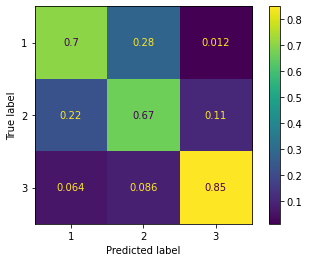

In [ ]:
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(X_train_pca, y_train)
plot_confusion_matrix(clf,X=X_test_pca, y_true=y_test,normalize='true')

In [ ]:
X = X.to_numpy()

In [ ]:
transformada_PCA.shape

(4965, 20)

In [ ]:
arboles = [5,150, 200]
resultados_gbt = experimentar_gbt(arboles, transformada_PCA, Y)
resultados_gbt

,número de arboles,F1 Score,F1 Score IC,GMEAN,GMEAN IC,Eficiencia Train,Eficiencia Train IC,eficiencia de prueba,eficiencia prueba IC
0,5.0,0.638761,0.138901,0.728905,0.099775,0.703729,0.043398,0.647351,0.126692
1,150.0,0.667947,0.141669,0.761995,0.092591,0.847065,0.044056,0.689243,0.118577
2,200.0,0.665019,0.138332,0.759839,0.090390,0.870294,0.037759,0.686422,0.115707


In [ ]:
# MLP

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(20,20, 20),activation = 'relu',max_iter=500)

/home/juan/simulation/simulation/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


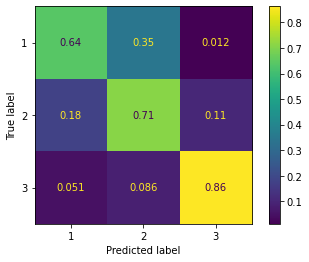

In [ ]:
model.fit(X_train_pca, y_train)
plot_confusion_matrix(model,X=X_test_pca, y_true=y_test,normalize='true')

In [ ]:
def MLP(nCaps, neuronCaps):
        #Validamos el modelo
    Folds = 4
    f1 = []
    gmean = []
    eficiencia_train = []
    eficiencia_test = []
    skf = StratifiedKFold(n_splits=Folds)
    for train, test in skf.split(transformada_PCA, Y):
        Xtrain, Ytrain, Xtest, Ytest = ut.get_training_test(X=transformada_PCA, Y=Y, train=train, test=test)

        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = None;
        if(nCaps == 1):
            #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
            mlp = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = (neuronCaps), activation = 'relu', max_iter=500), n_jobs=-1).fit(Xtrain, Ytrain)
        else:
            mlp = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = (neuronCaps, neuronCaps), activation = 'tanh', max_iter=500), n_jobs=-1).fit(Xtrain, Ytrain)

        f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current = ut.get_metrics(mlp, Xtrain, Xtest, Ytrain, Ytest)
        
        f1.append(f1_score_current)
        gmean.append(gmean_current)
        eficiencia_train.append(eficiencia_train_current)
        eficiencia_test.append(eficiencia_test_current)
    
    f1_mean, f1_ic, gmean_mean, gmean_ic, eficiencia_train_mean, eficiencia_train_ic, eficiencia_test_mean, eficiencia_test_ic = ut.get_means_and_ic(f1, gmean, eficiencia_train, eficiencia_test)

    print(f"Finalizado: {nCaps} capas y {neuronCaps} neuronas por capa")
    
    return f1_mean, f1_ic, gmean_mean, gmean_ic, eficiencia_train_mean, eficiencia_train_ic, eficiencia_test_mean, eficiencia_test_ic

In [ ]:
randn = np.random.randn
df_types = pd.DataFrame({
    'N. de capas ocultas' : pd.Series([1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]),
    'Neuronas por capa' : pd.Series([20,24,28,32,36,20,24,28,32,36,20,24,28,32,36])})

In [ ]:
f1 = []
f1_ic = []
gmean =[]
gmean_ic = []
efi_test = []
efi_test_ic = []
efi_train = []
efi_train_ic = []
for e, i in zip(df_types['N. de capas ocultas'], df_types['Neuronas por capa']):
    f1_mean, f1_ic_, gmean_mean, gmean_ic_, eficiencia_train_mean, eficiencia_train_ic, eficiencia_test_mean, eficiencia_test_ic = MLP(e, i)
    f1.append(f1_mean)
    f1_ic.append(f1_ic_)
    gmean.append(gmean_mean)
    gmean_ic.append(gmean_ic_)
    efi_test.append(eficiencia_test_mean)
    efi_test_ic.append(eficiencia_test_ic)
    efi_train.append(efi_train)
    efi_train_ic.append(efi_train_ic)
#maxi = np.array(meanPrueba).type()
#print(f'Mejor Modelo: {}')0
df_types["f1"] = f1
df_types["f1 IC"] = f1_ic
df_types["GMEAN"] = gmean
df_types["GMEAN IC"] = gmean_ic
df_types["Eficiencia Test"] = efi_test
df_types["Eficiencia Test IC"] = efi_test_ic
df_types["Eficiencia Train"] = efi_train
df_types["Eficiencia Train IC"] = efi_train_ic
df_types.set_index(['N. de capas ocultas','Neuronas por capa'], inplace=True)
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

Finalizado: 1 capas y 20 neuronas por capa
Finalizado: 1 capas y 24 neuronas por capa
Finalizado: 1 capas y 28 neuronas por capa
Finalizado: 1 capas y 32 neuronas por capa
Finalizado: 1 capas y 36 neuronas por capa
Finalizado: 2 capas y 20 neuronas por capa
Finalizado: 2 capas y 24 neuronas por capa
Finalizado: 2 capas y 28 neuronas por capa
Finalizado: 2 capas y 32 neuronas por capa
Finalizado: 2 capas y 36 neuronas por capa
Finalizado: 3 capas y 20 neuronas por capa
Finalizado: 3 capas y 24 neuronas por capa
Finalizado: 3 capas y 28 neuronas por capa
Finalizado: 3 capas y 32 neuronas por capa


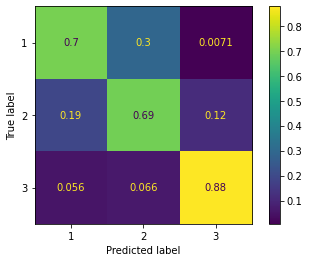

In [ ]:
manmodel = SVC(C=100,kernel='rbf', gamma=0.10, probability=True)
model.fit(X_train_pca, y_train)
plot_confusion_matrix(model,X=X_test_pca, y_true=y_test,normalize='true')

In [ ]:
def train_svm(kernel, C, gamma):
    Folds = 4
    EficienciaTrain = []
    EficienciaVal = []
    skf = StratifiedKFold(n_splits=Folds)
    porc_vectores = []
    f1 = []
    gmean = []
    models = []
    for train, test in skf.split(transformada_PCA, Y):
        Xtrain, Ytrain, Xtest, Ytest = ut.get_training_test(transformada_PCA, Y, train, test)
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = SVC(C=C,kernel=kernel, gamma=gamma, probability=True)
        model.fit(Xtrain, Ytrain)
        models.append(model)
        #Validación
        f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current = ut.get_metrics(model=model, X_train=Xtrain, X_test=Xtest, y_train=Ytrain, Ytest=Ytest)
        gmean.append(gmean_current)
        f1.append(f1_score_current)
        EficienciaTrain.append(eficiencia_train_current)
        EficienciaVal.append(eficiencia_test_current)
    
    f1_m = np.mean(f1)
    f1_ic = np.std(f1)
    gmean = np.mean(gmean)
    gmean_ic = np.std(gmean)
    efi_train = np.mean(EficienciaTrain)
    efi_train_ic = np.std(EficienciaTrain)
    efi_test = np.mean(EficienciaVal)
    efi_test_ic = np.std(EficienciaVal)
        
    print(f"Finalizado: {kernel} C: {C} gamma: {gamma}")
    
    return f1_m, f1_ic, gmean, gmean_ic, efi_train, efi_train_ic, efi_test, efi_test_ic

In [ ]:
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['lineal','lineal','lineal','lineal','lineal','lineal','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})

f1 = []
stdf1 = []
gmean =[]
stdgmean = []
efitrain = []
eftrainstd = []
efitest = []
efiteststd = []
for e, i, j in zip(df_types['Kernel'], df_types['C'], df_types['gamma']):
    if(e == 'lineal'):
        f1_m, f1_ic, gmean_, gmean_ic, efi_train_, efi_train_ic, efi_test, efi_test_ic = train_svm("linear", i, "auto")
    else:
        f1_m, f1_ic, gmean_, gmean_ic, efi_train_, efi_train_ic, efi_test, efi_test_ic = train_svm(e, i, j)
    f1.append(f1_m)
    stdf1.append(f1_ic)
    gmean.append(gmean_)
    stdgmean.append(gmean_ic)
    efitrain.append(efi_train_)
    eftrainstd.append(efi_train_ic)
    efitest.append(efi_test)
    efiteststd.append(efi_train_ic)
    
df_types.set_index(['Kernel','C','gamma'], inplace=True)
df_types["f1"] = f1
df_types["Intervalo de confianza f1"] = stdf1
df_types["G-mean"] = gmean
df_types["Intervalo de confianza G-mean"] = stdgmean
df_types["Eficiencia train"] = efitrain
df_types["Eficiencia train IC"] = eftrainstd
df_types["Eficiencia test"] = efitest
df_types["Eficiencia test IC"] = efiteststd

Finalizado: linear C: 0.001 gamma: auto
Finalizado: linear C: 0.01 gamma: auto
Finalizado: linear C: 0.1 gamma: auto
Finalizado: linear C: 1.0 gamma: auto
Finalizado: linear C: 10.0 gamma: auto
Finalizado: linear C: 100.0 gamma: auto
Finalizado: rbf C: 0.001 gamma: 0.01
Finalizado: rbf C: 0.001 gamma: 0.1
Finalizado: rbf C: 0.001 gamma: 1.0
Finalizado: rbf C: 0.01 gamma: 0.01
Finalizado: rbf C: 0.01 gamma: 0.1
Finalizado: rbf C: 0.01 gamma: 1.0
Finalizado: rbf C: 0.1 gamma: 0.01
Finalizado: rbf C: 0.1 gamma: 0.1
Finalizado: rbf C: 0.1 gamma: 1.0
Finalizado: rbf C: 1.0 gamma: 0.01
Finalizado: rbf C: 1.0 gamma: 0.1
Finalizado: rbf C: 1.0 gamma: 1.0
Finalizado: rbf C: 10.0 gamma: 0.01
Finalizado: rbf C: 10.0 gamma: 0.1
Finalizado: rbf C: 10.0 gamma: 1.0
Finalizado: rbf C: 100.0 gamma: 0.01
Finalizado: rbf C: 100.0 gamma: 0.1
Finalizado: rbf C: 100.0 gamma: 1.0


In [ ]:
df_types

f1  Intervalo de confianza f1    G-mean  \
Kernel C       gamma                                                  
lineal 0.001   0.00   0.428239                   0.049364  0.596830   
       0.010   0.00   0.611805                   0.120525  0.707242   
       0.100   0.00   0.649836                   0.150331  0.742916   
       1.000   0.00   0.656931                   0.159080  0.751063   
       10.000  0.00   0.660588                   0.163302  0.753821   
       100.000 0.00   0.661946                   0.162777  0.754616   
rbf    0.001   0.01   0.246165                   0.138509  0.505188   
               0.10   0.247783                   0.141312  0.507653   
               1.00   0.248125                   0.141904  0.508637   
       0.010   0.01   0.246165                   0.138509  0.505188   
               0.10   0.520445                   0.105394  0.653382   
               1.00   0.632861                   0.128840  0.722365   
       0.100   0.01   0.524388                   0.103668  0.654508   
               0.10   0.639975                   0.137168  0.732671   
               1.00   0.668464                   0.148931  0.755893   
       1.000   0.01   0.639925                   0.136712  0.733331   
               0.10   0.661447                   0.148597  0.752801   
               1.00   0.698409                   0.166640  0.783033   
       10.000  0.01   0.650975                   0.152612  0.744968   
               0.10   0.672428                   0.154639  0.761057   
               1.00   0.690316                   0.159240  0.779764   
       100.000 0.01   0.664173                   0.158949  0.756287   
               0.10   0.697712                   0.172821  0.783405   
               1.00   0.669365                   0.141224  0.765144   

                      Intervalo de confianza G-mean  Eficiencia train  \
Kernel C       gamma                                                    
lineal 0.001   0.00                             0.0          0.512058   
       0.010   0.00                             0.0          0.635652   
       0.100   0.00                             0.0          0.688757   
       1.000   0.00                             0.0          0.702185   
       10.000  0.00                             0.0          0.704065   
       100.000 0.00                             0.0          0.705341   
rbf    0.001   0.01                             0.0          0.404445   
               0.10                             0.0          0.407198   
               1.00                             0.0          0.410422   
       0.010   0.01                             0.0          0.404445   
               0.10                             0.0          0.580131   
               1.00                             0.0          0.654987   
       0.100   0.01                             0.0          0.582749   
               0.10                             0.0          0.673047   
               1.00                             0.0          0.704266   
       1.000   0.01                             0.0          0.673383   
               0.10                             0.0          0.700909   
               1.00                             0.0          0.754149   
       10.000  0.01                             0.0          0.695001   
               0.10                             0.0          0.722259   
               1.00                             0.0          0.786441   
       100.000 0.01                             0.0          0.708496   
               0.10                             0.0          0.754485   
               1.00                             0.0          0.824976   

                      Eficiencia train IC  Eficiencia test  Eficiencia test IC  
Kernel C       gamma                                                            
lineal 0.001   0.00              0.063312         0.480964            0.063312  
       0.010   0.00              0.0473

In [ ]:
model = SVC(C=100,kernel='rbf', gamma=0.10, probability=True)
model.fit(X_train_pca, y_train)
plot_confusion_matrix(model,X=X_test_pca, y_true=y_test,normalize='true')

In [ ]:
model.fit(X_train_pca, y_train)
plot_confusion_matrix(model,X=X_test_pca, y_true=y_test,normalize='true')